In [35]:
# import the necessary packages
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

The commented code section is optional. It is used to pass arguments to the python program when it is run by a CLI. However if you want to 
pass arguments just uncomment the commented block and change the parameter inside the cv2.imread to cv2.imread(args["image"]). When running from CLI,
python name.py --image 'img.jpg'. After reading the image, resizing is done for conveniece

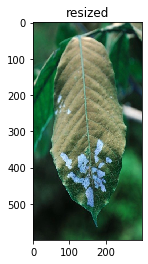

In [36]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())


# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread('test1.jpg')
resized = cv2.resize(image, (300,600), interpolation = cv2.INTER_AREA)
plt.imshow(resized)
plt.title('resized')
plt.show()

Performs initial step of meanshift segmentation of an image.
The function implements the filtering stage of meanshift segmentation, that is, the output of the function is the filtered “posterized” image with color gradients and fine-grain texture flattened.

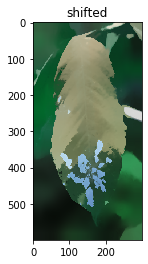

In [37]:
shifted = cv2.pyrMeanShiftFiltering(resized, 21, 51)
plt.imshow(shifted)
plt.title('shifted')
plt.show()

Converts the shifted image to a grayscale image

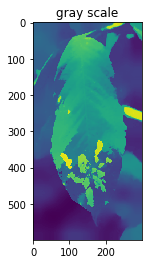

In [38]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title('gray scale')
plt.show()

Thresholding the grayscaled image. Different methods of thresholding can be done using the cv2 library. Here I am using the global thresholding and adaptive thresholding.

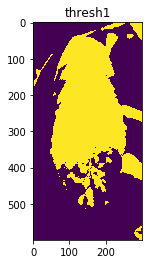

In [39]:
thresh1 = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)[1]
plt.imshow(thresh1)
plt.title('thresh1')
plt.show()

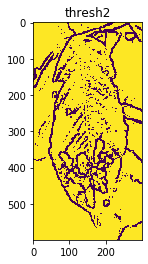

In [40]:
thresh2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(thresh2)
plt.title('thresh2')
plt.show()

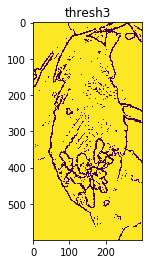

In [41]:
thresh3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(thresh3)
plt.title('thresh3')
plt.show()

Next we need to find the contour lines from the thresholded image. A contour line represents a separation between 2 segments. We can use any of the above 3 thresholded images. The following 3 cells shows the number of contour lines formed for each of the threshloding methods.

In [56]:
cnts = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

[INFO] 49 unique contours found


In [53]:
cnts = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

[INFO] 17 unique contours found


In [44]:
cnts = cv2.findContours(thresh3.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

[INFO] 22 unique contours found


In [57]:
for (i, c) in enumerate(cnts):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(resized, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(resized, [c], -1, (0, 255, 0), 2)

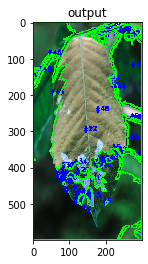

In [58]:
plt.imshow(resized)
plt.title('output')
plt.show()